#### Magic initialisation stuff

* Initialises a database connection semi-securely
* References a plotting library

In [35]:
#r "nuget: Microsoft.DotNet.Interactive.SqlServer, *-*"

Installed Packages Microsoft.DotNet.Interactive.SqlServer, 1.0.0-beta.25323.1

In [36]:
using System.IO;
var connectionString = await File.ReadAllTextAsync("C:\\\\Temp\\BestFunds.txt");
#r "nuget:ScottPlot, 5.0.*"

Error: ScottPlot version 5.0.* cannot be added because version 5.0.55 was added previously.

In [37]:

#!connect mssql --kernel-name BestFunds @csharp:connectionString


Error: System.InvalidOperationException: A kernel with name BestFunds is already present. Use a different value for the --kernel-name parameter.
   at Microsoft.DotNet.Interactive.SqlServer.ConnectMsSqlDirective.ConnectKernelsAsync(ConnectMsSqlKernel connectCommand, KernelInvocationContext context)
   at Microsoft.DotNet.Interactive.CompositeKernel.ConnectKernels[TCommand](TCommand command, ConnectKernelDirective`1 connectDirective, KernelInvocationContext context) in D:\a\_work\1\s\src\Microsoft.DotNet.Interactive\CompositeKernel.cs:line 275
   at Microsoft.DotNet.Interactive.CompositeKernel.<>c__DisplayClass21_0`1.<<AddConnectDirective>b__0>d.MoveNext() in D:\a\_work\1\s\src\Microsoft.DotNet.Interactive\CompositeKernel.cs:line 260
--- End of stack trace from previous location ---
   at Microsoft.DotNet.Interactive.Kernel.HandleAsync(KernelCommand command, KernelInvocationContext context) in D:\a\_work\1\s\src\Microsoft.DotNet.Interactive\Kernel.cs:line 371
   at Microsoft.DotNet.Interactive.CompositeKernel.HandleAsync(KernelCommand command, KernelInvocationContext context) in D:\a\_work\1\s\src\Microsoft.DotNet.Interactive\CompositeKernel.cs:line 216
   at Microsoft.DotNet.Interactive.KernelCommandPipeline.<BuildPipeline>b__6_0(KernelCommand command, KernelInvocationContext context, KernelPipelineContinuation _) in D:\a\_work\1\s\src\Microsoft.DotNet.Interactive\KernelCommandPipeline.cs:line 60
   at Microsoft.DotNet.Interactive.KernelCommandPipeline.<>c__DisplayClass6_1.<<BuildPipeline>b__3>d.MoveNext() in D:\a\_work\1\s\src\Microsoft.DotNet.Interactive\KernelCommandPipeline.cs:line 75
--- End of stack trace from previous location ---
   at Microsoft.DotNet.Interactive.App.KernelExtensions.<>c__DisplayClass6_0.<<UseTelemetrySender>b__0>d.MoveNext() in D:\a\_work\1\s\src\dotnet-interactive\KernelExtensions.cs:line 457
--- End of stack trace from previous location ---
   at Microsoft.DotNet.Interactive.KernelCommandPipeline.<>c__DisplayClass6_1.<<BuildPipeline>b__3>d.MoveNext() in D:\a\_work\1\s\src\Microsoft.DotNet.Interactive\KernelCommandPipeline.cs:line 75
--- End of stack trace from previous location ---
   at Microsoft.DotNet.Interactive.App.KernelExtensionLoader.<>c__DisplayClass0_0.<<UseNuGetExtensions>b__0>d.MoveNext() in D:\a\_work\1\s\src\dotnet-interactive\KernelExtensionLoader.cs:line 25
--- End of stack trace from previous location ---
   at Microsoft.DotNet.Interactive.KernelCommandPipeline.<>c__DisplayClass6_1.<<BuildPipeline>b__3>d.MoveNext() in D:\a\_work\1\s\src\Microsoft.DotNet.Interactive\KernelCommandPipeline.cs:line 75
--- End of stack trace from previous location ---
   at Microsoft.DotNet.Interactive.App.KernelExtensions.<>c__DisplayClass5_0.<<UseSecretManager>b__0>d.MoveNext() in D:\a\_work\1\s\src\dotnet-interactive\KernelExtensions.cs:line 388
--- End of stack trace from previous location ---
   at Microsoft.DotNet.Interactive.KernelCommandPipeline.<>c__DisplayClass6_0.<<BuildPipeline>g__Combine|2>d.MoveNext() in D:\a\_work\1\s\src\Microsoft.DotNet.Interactive\KernelCommandPipeline.cs:line 73
--- End of stack trace from previous location ---
   at Microsoft.DotNet.Interactive.KernelCommandPipeline.<>c__DisplayClass6_0.<<BuildPipeline>g__Combine|2>d.MoveNext() in D:\a\_work\1\s\src\Microsoft.DotNet.Interactive\KernelCommandPipeline.cs:line 73
--- End of stack trace from previous location ---
   at Microsoft.DotNet.Interactive.KernelCommandPipeline.<>c__DisplayClass6_0.<<BuildPipeline>g__Combine|2>d.MoveNext() in D:\a\_work\1\s\src\Microsoft.DotNet.Interactive\KernelCommandPipeline.cs:line 73
--- End of stack trace from previous location ---
   at Microsoft.DotNet.Interactive.KernelCommandPipeline.SendAsync(KernelCommand command, KernelInvocationContext context) in D:\a\_work\1\s\src\Microsoft.DotNet.Interactive\KernelCommandPipeline.cs:line 41

#### Querying our database

This query sums the value of every transaction made by a person with the given name.

In [38]:
#!set --name personName --value @input:"Enter a person's name"

DECLARE @Income DECIMAL
SELECT @Income = SUM(Amount)
FROM Transactions
WHERE PersonName = @personName AND TransactionType = 'income'

DECLARE @Outgoing DECIMAL
SELECT @Outgoing = SUM(Amount)
FROM Transactions
WHERE PersonName = @personName AND TransactionType = 'expense'

SELECT @Income - @Outgoing AS Balance

Error: Command cancelled.

#### Drawing some graphs

Here are some sample graphs


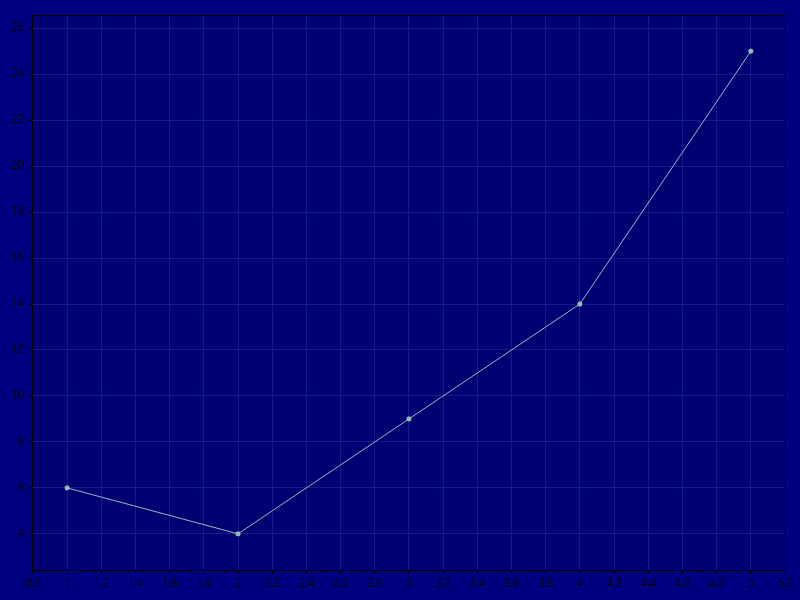

In [98]:
// https://scottplot.net/quickstart/notebook/
using ScottPlot;
using Microsoft.DotNet.Interactive.Formatting;

var x = amount;

Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetPngHtml(800, 600)), HtmlFormatter.MimeType);

// create sample data
double[] dataX = new double[] { 1, 2, 3, 4, 5 };
double[] dataY = new double[] { 6, 4, 9, 14, 25 };

// plot the data
ScottPlot.Plot plot = new();
plot.FigureBackground.Color = Colors.Navy;
plot.DataBackground.Color = Colors.Navy.Darken(0.1);
plot.Grid.MajorLineColor = Colors.Navy.Lighten(0.1);
plot.Add.Palette = new ScottPlot.Palettes.Frost();
plot.Add.Scatter(dataX, dataY);

// display the plot
plot



In [135]:
#!sql-BestFunds --name result

 SELECT TOP 5 PersonName, Amount FROM dbo.Transactions order by Amount desc
 

Adding shared variable declaration statement : DECLARE @personName NVarChar(12) = N'Aaron Taylor';

Adding shared variable declaration statement : DECLARE @amount NVarChar(6) = N'SELECT';

(5 rows affected)

PersonName,Amount
Susan Hall,47609.00
Diane Johnson,47477.00
Joyce Chavez,38737.00
Anna Cooper,35882.00
Angela Torres,35427.00



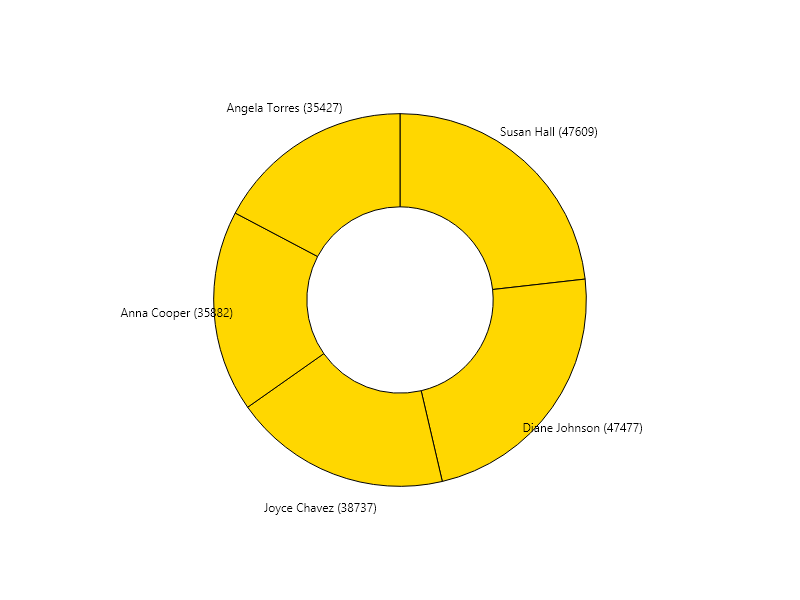

In [ ]:
#!share --from sql-BestFunds result

List<PieSlice> slices = new();

var data = result.First().Data.ToList();
for (var i = 0; i < data.Count(); i++)
{
    var row = data[i];
    foreach (var column in row)
    {
        if (column.Key == "PersonName") {
            slices.Add(new PieSlice() { FillColor = Colors.Gold, Label =  column.Value.ToString() });
        }
        else {
            var amount = Double.Parse(column.Value.ToString());
            slices[i].Value = amount;
            slices[i].Label += $" ({amount})";
        }
    }
}

ScottPlot.Plot myPlot = new();


// List<PieSlice> slices = new()
// {
//     new PieSlice() { Value = 5, FillColor = Colors.Red, Label =  "personName" },
//     new PieSlice() { Value = 2, FillColor = Colors.Orange, Label = "Orange" },
//     new PieSlice() { Value = 8, FillColor = Colors.Gold, Label = "Yellow" },
//     new PieSlice() { Value = 4, FillColor = Colors.Green, Label = "Green" },
//     new PieSlice() { Value = 8, FillColor = Colors.Blue, Label = "Blue" },
// };

var pie = myPlot.Add.Pie(slices);
pie.DonutFraction = .5;

myPlot.ShowLegend();

// hide unnecessary plot components
myPlot.Axes.Frameless();
myPlot.HideGrid();

myPlot





In [151]:
var number1 = 5;
var number2 = 10;

var result = number1 + number2;

Console.Write(result);

15